In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

!pip install seaborn==0.11.1
import seaborn as sns

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.11.0
import folium # plotting library

print('Folium installed. Version: ', folium.__version__)
print('Libraries imported.')

Folium installed. Version:  0.11.0
Libraries imported.


In [2]:
# Print all folium subpackages
import pkgutil
import scipy
package=sns
for importer, modname, ispkg in pkgutil.walk_packages(path=package.__path__,
                                                      prefix=package.__name__+'.',
                                                      onerror=lambda x: None):
    print(modname)

seaborn._core
seaborn._decorators
seaborn._docstrings
seaborn._statistics
seaborn._testing
seaborn.algorithms
seaborn.apionly
seaborn.axisgrid
seaborn.categorical
seaborn.cm
seaborn.colors
seaborn.colors.crayons
seaborn.colors.xkcd_rgb
seaborn.conftest
seaborn.distributions
seaborn.external
seaborn.external.docscrape
seaborn.external.husl
seaborn.external.six
seaborn.linearmodels
seaborn.matrix
seaborn.miscplot
seaborn.palettes
seaborn.rcmod
seaborn.regression
seaborn.relational
seaborn.tests
seaborn.tests.test_algorithms
seaborn.tests.test_axisgrid
seaborn.tests.test_categorical
seaborn.tests.test_core
seaborn.tests.test_decorators
seaborn.tests.test_distributions
seaborn.tests.test_docstrings
seaborn.tests.test_matrix
seaborn.tests.test_miscplot
seaborn.tests.test_palettes
seaborn.tests.test_rcmod
seaborn.tests.test_regression
seaborn.tests.test_relational
seaborn.tests.test_statistics
seaborn.tests.test_utils
seaborn.timeseries
seaborn.utils
seaborn.widgets


In [3]:
# Print all folium subpackages
import pkgutil
import scipy
package=folium
for importer, modname, ispkg in pkgutil.walk_packages(path=package.__path__,
                                                      prefix=package.__name__+'.',
                                                      onerror=lambda x: None):
    print(modname)

folium._version
folium.features
folium.folium
folium.map
folium.plugins
folium.plugins.antpath
folium.plugins.beautify_icon
folium.plugins.boat_marker
folium.plugins.draw
folium.plugins.dual_map
folium.plugins.fast_marker_cluster
folium.plugins.feature_group_sub_group
folium.plugins.float_image
folium.plugins.fullscreen
folium.plugins.heat_map
folium.plugins.heat_map_withtime
folium.plugins.locate_control
folium.plugins.marker_cluster
folium.plugins.measure_control
folium.plugins.minimap
folium.plugins.mouse_position
folium.plugins.pattern
folium.plugins.polyline_offset
folium.plugins.polyline_text_path
folium.plugins.scroll_zoom_toggler
folium.plugins.search
folium.plugins.terminator
folium.plugins.time_slider_choropleth
folium.plugins.timestamped_geo_json
folium.plugins.timestamped_wmstilelayer
folium.raster_layers
folium.utilities
folium.vector_layers


In [4]:
# === REMOVE BEFORE SHIPPING ===

In [5]:
API_KEY="2Unu5SrPLuvEtFhVrtjfp1d--5rPQ12RxQ57zUbgjU8RXwTmdJDxLzKRauLyUnQc92aKDDIssNNH9QUBj-LXhXSqfkwMW0GiI1tzoL2Era9miQkkS-VU_Ra6L9DfX3Yx"

In [6]:
# ========================================================

In [7]:
# Code Snippet taken from https://github.com/Yelp/yelp-fusion/blob/master/fusion/python/sample.py
from __future__ import print_function

import argparse
import json
import pprint
import requests
import sys
import urllib
try:
    # For Python 3.0 and later
    from urllib.error import HTTPError
    from urllib.parse import quote
    from urllib.parse import urlencode
except ImportError:
    # Fall back to Python 2's urllib2 and urllib
    from urllib2 import HTTPError
    from urllib import quote
    from urllib import urlencode

API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/'  # Business ID will come after slash.
SEARCH_LIMIT = 50

def request(host, path, api_key, url_params=None):
    """Given your API_KEY, send a GET request to the API.
    Args:
        host (str): The domain host of the API.
        path (str): The path of the API after the domain.
        API_KEY (str): Your API Key.
        url_params (dict): An optional set of query parameters in the request.
    Returns:
        dict: The JSON response from the request.
    Raises:
        HTTPError: An error occurs from the HTTP request.
    """
    url_params = url_params or {}
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }

    print(u'Querying {0} ...'.format(url))

    response = requests.request('GET', url, headers=headers, params=url_params)

    return response.json()


def get_business(api_key, business_id):
    """Query the Business API by a business ID.
    Args:
        business_id (str): The ID of the business to query.
    Returns:
        dict: The JSON response from the request.
    """
    business_path = BUSINESS_PATH + business_id

    return request(API_HOST, business_path, api_key)


def search(api_key, term, location):
    """Query the Search API by a search term and location.
    Args:
        term (str): The search term passed to the API.
        location (str): The search location passed to the API.
    Returns:
        dict: The JSON response from the request.
    """

    url_params = {
        'term': term.replace(' ', '+'),
        'location': location.replace(' ', '+'),
        'limit': SEARCH_LIMIT
    }
    return request(API_HOST, SEARCH_PATH, api_key, url_params=url_params)


def query_api(term, location):
    """Queries the API by the input values from the user.
    Args:
        term (str): The search term to query.
        location (str): The location of the business to query.
    """
    response = search(API_KEY, term, location)
    businesses = response.get('businesses')
    total = response.get('total')
    print("For term '{}' found: {}".format(term, total))
    
    return businesses

In [8]:
# Go over all boroughs of Stuttgart and search for businesses
# FYI: I had issues with the foursquare verification and therefore had to use Yelp. However at yelp the number of results per query is limited to 50 by their API.
# To circumvent this and enlarge my database I am not only search for a specific city, but all for all individual boroughs in that city.
# Furthermore, since foursquare does not have this problem I did not automate this step but composed the list manually.
stg_boroughs = ["Stuttgart Mitte","Stuttgart Nord","Stuttgart Ost","Stuttgart Süd","Stuttgart West","Stuttgart Bad Canstatt","Stuttgart Birkach","Stuttgart Botnang","Stuttgart Degerloch","Stuttgart Feuerbach","Stuttgart Hedelfingen","Stuttgart Möhringen","Stuttgart Mühlhausen","Stuttgart Münster","Stuttgart Obertürkheim","Stuttgart Plieningen","Stuttgart Sillenbuch","Stuttgart Stammheim","Stuttgart Untertürkheim","Stuttgart Vaihingen","Stuttgart Wangen","Stuttgart Weilimdorf","Stuttgart Zuffenhausen"]
restaurants = []
bars = []
#hotels = []
clubs = []
for location in stg_boroughs:
    print("Searching in borough: ", location)
    restaurants_b = query_api(term="restaurants", location=location)
    bars_b = query_api(term="bars", location=location)
    #hotels_b = query_api(term="hotels", location=location)
    clubs_b = query_api(term="clubs", location=location)

    if restaurants_b:
        restaurants.extend(restaurants_b)
    if bars_b:
        bars.extend(bars_b)
    #if hotels_b:
        #hotels.extend(hotels_b)
    if clubs_b:
        clubs.extend(clubs_b)
    
print("Number of queried restaurants: ", len(restaurants))
print("Number of queried bars: ", len(bars))
#print("Number of queried hotels: ", len(hotels))
print("Number of queried clubs: ", len(clubs))

Searching in borough:  Stuttgart Mitte
Querying https://api.yelp.com/v3/businesses/search ...
For term 'restaurants' found: 786
Querying https://api.yelp.com/v3/businesses/search ...
For term 'bars' found: 184
Querying https://api.yelp.com/v3/businesses/search ...
For term 'clubs' found: 34
Searching in borough:  Stuttgart Nord
Querying https://api.yelp.com/v3/businesses/search ...
For term 'restaurants' found: 1100
Querying https://api.yelp.com/v3/businesses/search ...
For term 'bars' found: 230
Querying https://api.yelp.com/v3/businesses/search ...
For term 'clubs' found: 36
Searching in borough:  Stuttgart Ost
Querying https://api.yelp.com/v3/businesses/search ...
For term 'restaurants' found: 1300
Querying https://api.yelp.com/v3/businesses/search ...
For term 'bars' found: 272
Querying https://api.yelp.com/v3/businesses/search ...
For term 'clubs' found: 40
Searching in borough:  Stuttgart Süd
Querying https://api.yelp.com/v3/businesses/search ...
For term 'restaurants' found: 110

In [9]:
# Number of boroughs in Stutgart
len(stg_boroughs)

23

In [10]:
# Transform dict to pd frame
restaurants_df = pd.DataFrame.from_dict(restaurants)
bars_df = pd.DataFrame.from_dict(bars)
clubs_df = pd.DataFrame.from_dict(clubs)

# Add category to pd frame for identification in merged pd frame
restaurants_df["category"] = "restaurants"
bars_df["category"] = "bars"
clubs_df["category"] = "clubs"

# Merge all pd frames
businesses_df = pd.concat([restaurants_df, bars_df, clubs_df])

In [11]:
def drop_duplicated_businesses(df):
    df_out = df.drop_duplicates(subset=['id'])
    print("Number of input businesses: ", df.shape[0])
    print("Number of output businesses: ", df_out.shape[0])
    print("Number of dropped duplicates: ", df.shape[0] - df_out.shape[0])
    return df_out

In [12]:
# Drop duplicate businesses in df
businesses_df = drop_duplicated_businesses(businesses_df)

Number of input businesses:  3034
Number of output businesses:  701
Number of dropped duplicates:  2333


In [13]:
businesses_df.head(n=3)

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,category
0,qngSwQ3PmyYxmYRByOcccw,gaststätte-schlesinger-stuttgart,Gaststätte Schlesinger,https://s3-media3.fl.yelpcdn.com/bphoto/srAEW1...,False,https://www.yelp.com/biz/gastst%C3%A4tte-schle...,28,"[{'alias': 'german', 'title': 'German'}]",4.5,"{'latitude': 48.77951, 'longitude': 9.17287}",[],€€,"{'address1': 'Schloßstr. 28', 'address2': None...",+49711296515,+49 711 296515,454.889531,restaurants
1,itdqzog_6HLeQEFQo_PBrA,carls-brauhaus-stuttgart,Carls Brauhaus,https://s3-media2.fl.yelpcdn.com/bphoto/lCXgsn...,False,https://www.yelp.com/biz/carls-brauhaus-stuttg...,84,"[{'alias': 'german', 'title': 'German'}, {'ali...",3.5,"{'latitude': 48.779358603474, 'longitude': 9.1...",[],€€,"{'address1': 'Stauffenbergstr. 1', 'address2':...",+4971125974611,+49 711 25974611,86.304943,restaurants
2,GEfDj2RVBdoVhhtVltt03A,yafa-stuttgart,YAFA,https://s3-media3.fl.yelpcdn.com/bphoto/rxRFpj...,False,https://www.yelp.com/biz/yafa-stuttgart?adjust...,1,"[{'alias': 'mideastern', 'title': 'Middle East...",5.0,"{'latitude': 48.77259, 'longitude': 9.1792}",[],NaN,"{'address1': 'Hauptstätter Str. 31', 'address2...",+4971125514050,+49 711 25514050,817.497838,restaurants


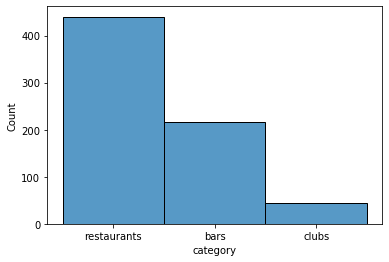

In [14]:
# EDA
sns.histplot(businesses_df["category"])

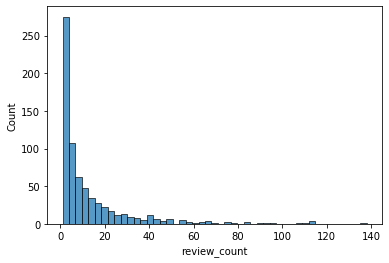

In [15]:
# EDA
sns.histplot(businesses_df["review_count"])

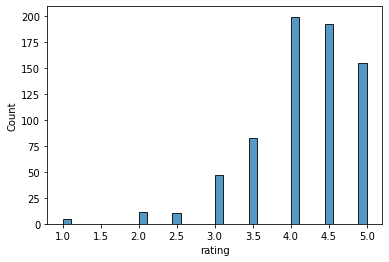

In [16]:
# EDA
sns.histplot(businesses_df["rating"])

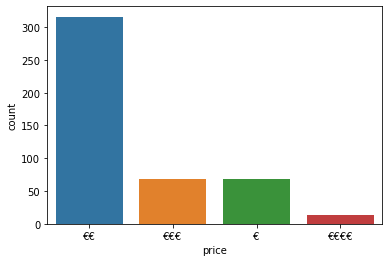

In [17]:
# EDA
sns.countplot(x="price", data=businesses_df)

Text(0.5, 1.0, 'Influence of price on rating')

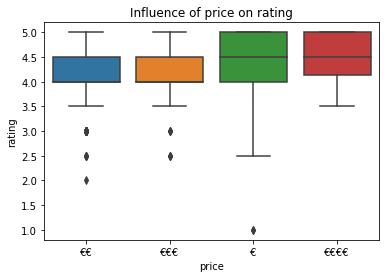

In [18]:
# EDA
ax = sns.boxplot(data=businesses_df, x="price", y="rating")
ax.set_title('Influence of price on rating')

Text(0.5, 1.0, 'Influence of review_count on rating')

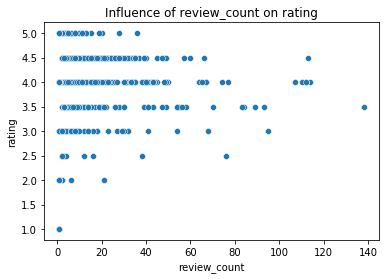

In [19]:
# EDA
ax = sns.scatterplot(data=businesses_df, x="review_count", y="rating")
ax.set_title('Influence of review_count on rating')

Text(0.5, 1.0, 'Influence of business category on rating')

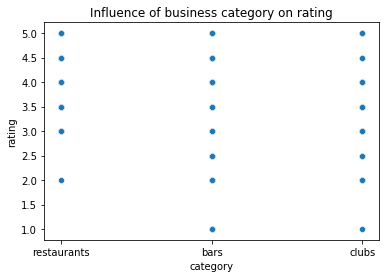

In [20]:
# EDA
ax = sns.scatterplot(data=businesses_df, x="category", y="rating")
ax.set_title('Influence of business category on rating')

In [21]:
def filter_df(df):
    # Filter df by rating and review cound
    df = df.drop(columns=['alias', 'is_closed', 'url', 'transactions', 'phone', 'display_phone'])
    df_review_count_median = df["review_count"].median()
    df_rating_median = df["rating"].median()
    
    filt_threshold_rating = 3.5 # df["rating"].median()
    filt_threshold_review_count = 10 # df["review_count"].median()
    
    df_filt = df[df["distance"] <= 4000] # filter out businesses that are farther away than 4 km
    df_filt = df_filt[df_filt["rating"] >= filt_threshold_rating]
    df_filt = df_filt[df_filt["review_count"] >= filt_threshold_review_count]
    
    # Plot input df as histograms
    fig1, axs1 = plt.subplots(1,2,figsize=(6,2))
    df["rating"].hist(ax=axs1[0])
    df["review_count"].hist(ax=axs1[1])
    axs1[0].set_title('Rating (original)')
    axs1[1].set_title('Review Count (original)')
    print("Median Rating: {}\nMedian Review Count: {}".format(df_rating_median, df_review_count_median))
    
    # Plot filtered df as histograms
    fig2, axs2 = plt.subplots(1,2,figsize=(6,2))
    df_filt["rating"].hist(ax=axs2[0])
    df_filt["review_count"].hist(ax=axs2[1])
    axs2[0].set_title('Rating (filt)')
    axs2[1].set_title('Review Count (filt)')
    
    print("Number of input businesses: ", df.shape[0])
    print("Number of output businesses: ", df_filt.shape[0])
    print("Number of filtered businesses: ", df.shape[0] - df_filt.shape[0])
    
    return df_filt

Median Rating: 4.0
Median Review Count: 5.0
Number of input businesses:  701
Number of output businesses:  188
Number of filtered businesses:  513


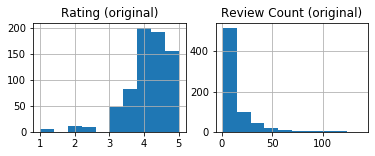

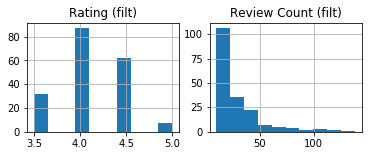

In [22]:
# Filter df by review count and ratings
businesses_df_filt = filter_df(businesses_df)

In [23]:
def get_lat_long_from_address(city, country=""):
    geolocator = Nominatim(user_agent="my_user_agent")
    loc = geolocator.geocode(city+','+ country)
    lat = loc.latitude
    long = loc.longitude
    #print("Lat: {}, Long: {}".format(lat, long))
    return (lat, long)

In [24]:
def add_circles_from_df_to_map(m, df, color='red'):
    for _, biz in df.iterrows():
        lat = biz["coordinates"]["latitude"]
        long = biz["coordinates"]["longitude"]
        tooltip = biz["name"] + " ({}* {})".format(biz["rating"], biz["category"][0:-1])
        folium.vector_layers.Circle((lat,long), radius=50, color=color, fill=True, 
                                    tooltip=tooltip).add_to(m) # radius in meters

In [25]:
# Get lat long coordinates from address
location_lat_long = get_lat_long_from_address(city=stg_boroughs[0])

# Create map
m = folium.Map(location=location_lat_long, zoom_start=12)

# Add business markers on map
add_circles_from_df_to_map(m, businesses_df_filt[businesses_df_filt['category'] == "restaurants"], color='red')
add_circles_from_df_to_map(m, businesses_df_filt[businesses_df_filt['category'] == "bars"], color='blue')
add_circles_from_df_to_map(m, businesses_df_filt[businesses_df_filt['category'] == "clubs"], color='green')

# Display map
m

In [26]:
# Rearrange df, so that lat long coords are in separate columns
businesses_df_filt["lat"] = businesses_df_filt["coordinates"].apply(lambda row: row["latitude"])
businesses_df_filt["long"] = businesses_df_filt["coordinates"].apply(lambda row: row["longitude"])

# Drop unwanted columns
businesses_df_filt = businesses_df_filt.drop(columns=['image_url', 'categories', 'coordinates', 'location', 'distance', 'price'])

# Display df
businesses_df_filt.head(n=5)

,id,name,review_count,rating,category,lat,long
0,qngSwQ3PmyYxmYRByOcccw,Gaststätte Schlesinger,28,4.5,restaurants,48.779510,9.172870
1,itdqzog_6HLeQEFQo_PBrA,Carls Brauhaus,84,3.5,restaurants,48.779359,9.180019
3,f4e3MmCiABCcTv1CZ9uVPQ,Biergarten im Schlossgarten,39,4.0,restaurants,48.784487,9.185988
4,xVmR_J2FjrGNOrWn_y2QKg,Brauhaus Schönbuch,93,3.5,restaurants,48.780325,9.178250
5,sC8Fo9k4CCgp5vPKe8-LrA,Flo,19,4.0,restaurants,48.780412,9.177772


In [27]:
# Convert df to list for kMeans clustering
businesses_latlong = businesses_df_filt[["lat","long"]].values.tolist()
businesses_name = businesses_df_filt["name"].values.tolist()
print("Conversion Check:")
print("businesses_latlong[0:3] =\n", businesses_latlong[0:3])
print("businesses_name[0:3] =\n", businesses_name[0:3])

Conversion Check:
businesses_latlong[0:3] =
 [[48.77951, 9.17287], [48.779358603474, 9.18001866427915], [48.7844872560226, 9.18598838952696]]
businesses_name[0:3] =
 ['Gaststätte Schlesinger', 'Carls Brauhaus', 'Biergarten im Schlossgarten']


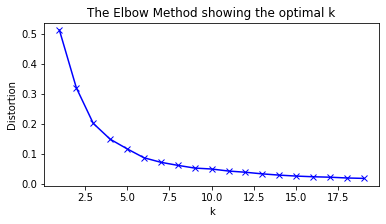

In [28]:
# kMeans Elbow Method - find optimal k
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(businesses_latlong)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(6,3))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# FOUND OPTIMAL k = 8

In [29]:
# Perform kMeans clustering with optimal k
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(businesses_latlong)
print("kmeans.labels_:\n", kmeans.labels_)
print("kmeans.cluster_centers_:\n", kmeans.cluster_centers_)

kmeans.labels_:
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5
 3 5 0 5 3 0 0 3 0 4 0 0 3 0 3 6 0 3 0 3 3 3 3 3 3 2 3 3 3 3 3 3 3 1 1 3 3
 3 3 0 0 0 0 0 0 0 5 0 0 6 0 0 0 0 4 4 4 4 4 4 4 2 4 2 4 3 7 3 6 6 6 6 6 2
 2 2 2 2 2 2 2 2 2 1 1 2 1 1 5 5 5 5 6 6 6 2 4 2 2 4 5 5 5 5 6 0 1 1 1 1 1
 1 1 1 1 6 7 5 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 0 3 3 3 0 0 2 3 3 3 3 6
 3 3 3]
kmeans.cluster_centers_:
 [[48.79935282  9.21685144]
 [48.7338025   9.11177317]
 [48.71783855  9.15251088]
 [48.77430195  9.17278703]
 [48.71928289  9.22430074]
 [48.8265005   9.16931293]
 [48.77362625  9.27115981]
 [48.81816308  9.08603258]]


In [30]:
def convert_list_of_lists_into_seperate_lists(list_of_lists):
    xs, ys = [], []
    for y, x in list_of_lists:
        xs.append(x)
        ys.append(y)
        
    return xs, ys

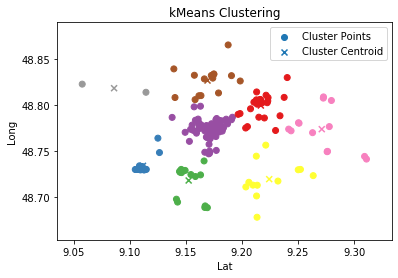

In [31]:
# Convert data format for plotting
xs, ys = convert_list_of_lists_into_seperate_lists(businesses_latlong)
xs_centroids, ys_centroids = convert_list_of_lists_into_seperate_lists(kmeans.cluster_centers_)

# Plot kMeans cluster points and cluster centroids
plt.scatter(xs, ys, c=kmeans.labels_, cmap=plt.cm.Set1)
plt.scatter(xs_centroids, ys_centroids, c=list(set(kmeans.labels_)), cmap=plt.cm.Set1, marker="x")
plt.legend(["Cluster Points","Cluster Centroid"])
plt.title("kMeans Clustering")
plt.xlabel("Lat")
plt.ylabel("Long")
plt.show()

In [32]:
# Scale features (review count and rating) to the intervall [0,1] -> normalization
scaler = MinMaxScaler()
businesses_df_filt["review_count_normalized"] = scaler.fit_transform(businesses_df_filt["review_count"].to_numpy().reshape(-1, 1)) # MinMaxScaler expects multiple features. Since we have only one feature we need to reshape(-1,1)
businesses_df_filt["rating_normalized"] = scaler.fit_transform(businesses_df_filt["rating"].to_numpy().reshape(-1, 1)) # MinMaxScaler expects multiple features. Since we have only one feature we need to reshape(-1,1)

# Calculate score per business (from rating + review count)
businesses_df_filt["business_score"] = businesses_df_filt.apply(lambda row: 0.5*row["review_count_normalized"]+0.5*row["rating_normalized"], axis=1)

businesses_df_filt.head(n=5)

,id,name,review_count,rating,category,lat,long,review_count_normalized,rating_normalized,business_score
0,qngSwQ3PmyYxmYRByOcccw,Gaststätte Schlesinger,28,4.5,restaurants,48.779510,9.172870,0.140625,0.666667,0.403646
1,itdqzog_6HLeQEFQo_PBrA,Carls Brauhaus,84,3.5,restaurants,48.779359,9.180019,0.578125,0.000000,0.289062
3,f4e3MmCiABCcTv1CZ9uVPQ,Biergarten im Schlossgarten,39,4.0,restaurants,48.784487,9.185988,0.226562,0.333333,0.279948
4,xVmR_J2FjrGNOrWn_y2QKg,Brauhaus Schönbuch,93,3.5,restaurants,48.780325,9.178250,0.648438,0.000000,0.324219
5,sC8Fo9k4CCgp5vPKe8-LrA,Flo,19,4.0,restaurants,48.780412,9.177772,0.070312,0.333333,0.201823


In [33]:
# Append kmeans labels to df
businesses_df_filt["kmeans_cluster"] = kmeans.labels_
businesses_df_filt["cluster_score_normalized"] = np.NaN # [np.NaN]*len(kmeans.labels_)
    
businesses_df_filt.head(n=5)

,id,name,review_count,rating,category,lat,long,review_count_normalized,rating_normalized,business_score,kmeans_cluster,cluster_score_normalized
0,qngSwQ3PmyYxmYRByOcccw,Gaststätte Schlesinger,28,4.5,restaurants,48.779510,9.172870,0.140625,0.666667,0.403646,3,NaN
1,itdqzog_6HLeQEFQo_PBrA,Carls Brauhaus,84,3.5,restaurants,48.779359,9.180019,0.578125,0.000000,0.289062,3,NaN
3,f4e3MmCiABCcTv1CZ9uVPQ,Biergarten im Schlossgarten,39,4.0,restaurants,48.784487,9.185988,0.226562,0.333333,0.279948,3,NaN
4,xVmR_J2FjrGNOrWn_y2QKg,Brauhaus Schönbuch,93,3.5,restaurants,48.780325,9.178250,0.648438,0.000000,0.324219,3,NaN
5,sC8Fo9k4CCgp5vPKe8-LrA,Flo,19,4.0,restaurants,48.780412,9.177772,0.070312,0.333333,0.201823,3,NaN


In [34]:
# Calculate cluster scores
cluster_scores = []
for cluster in range(n_clusters):
    cluster_score = businesses_df_filt[businesses_df_filt["kmeans_cluster"] == cluster].mean()["business_score"]
    cluster_scores.append(cluster_score)
    
# Normalize cluster scores to interval [0,1]
scaler = MinMaxScaler()
cluster_scores_normalized = scaler.fit_transform(np.array(cluster_scores).reshape(-1, 1)).reshape(1, -1)[0]

# Print cluster scores
print("cluster_scores:\n", cluster_scores)
print("cluster_score_normalized:\n", cluster_scores_normalized)

cluster_scores:
 [0.28867669753086433, 0.20842013888888905, 0.2531105324074075, 0.31262112403100784, 0.20952690972222232, 0.24800347222222233, 0.23717948717948728, 0.3958333333333335]
cluster_score_normalized:
 [0.42823324 0.         0.23845916 0.55599599 0.00590551 0.21120889
 0.15345423 1.        ]


In [35]:
# Copy cluster scores into df
for idx, row in businesses_df_filt.iterrows():
    cluster_score = cluster_scores_normalized[row["kmeans_cluster"]]
    #businesses_df_filt.set_value(idx, 'cluster_score_normalized', cluster_score) # deprecated
    businesses_df_filt.at[idx, 'cluster_score_normalized'] = cluster_score
    
    
businesses_df_filt.head(n=5)   

,id,name,review_count,rating,category,lat,long,review_count_normalized,rating_normalized,business_score,kmeans_cluster,cluster_score_normalized
0,qngSwQ3PmyYxmYRByOcccw,Gaststätte Schlesinger,28,4.5,restaurants,48.779510,9.172870,0.140625,0.666667,0.403646,3,0.555996
1,itdqzog_6HLeQEFQo_PBrA,Carls Brauhaus,84,3.5,restaurants,48.779359,9.180019,0.578125,0.000000,0.289062,3,0.555996
3,f4e3MmCiABCcTv1CZ9uVPQ,Biergarten im Schlossgarten,39,4.0,restaurants,48.784487,9.185988,0.226562,0.333333,0.279948,3,0.555996
4,xVmR_J2FjrGNOrWn_y2QKg,Brauhaus Schönbuch,93,3.5,restaurants,48.780325,9.178250,0.648438,0.000000,0.324219,3,0.555996
5,sC8Fo9k4CCgp5vPKe8-LrA,Flo,19,4.0,restaurants,48.780412,9.177772,0.070312,0.333333,0.201823,3,0.555996


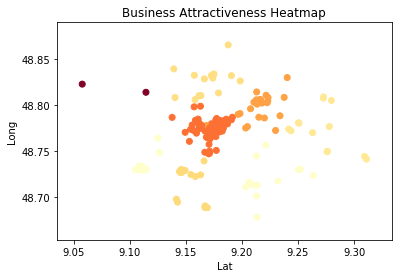

In [36]:
lat = businesses_df_filt["lat"].tolist()
long = businesses_df_filt["long"].tolist()
score = businesses_df_filt["cluster_score_normalized"].tolist()

plt.scatter(xs, ys, c=score, cmap=plt.cm.YlOrRd)
#plt.scatter(xs_centroids, ys_centroids, c=list(set(kmeans.labels_)), cmap=plt.cm.YlOrBr, marker="x")
#plt.legend(["Cluster Points","Cluster Centroid"])
plt.title("Business Attractiveness Heatmap")
plt.xlabel("Lat")
plt.ylabel("Long")
plt.show()

In [47]:
def get_hex_color_from_cmap(score, cmap='YlOrRd'): # colormap from: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
    cmap = matplotlib.cm.get_cmap(cmap)
    rgba = cmap(score)
    hex_color = matplotlib.colors.to_hex([rgba[0], rgba[1] , rgba[2], rgba[3]], keep_alpha=False)
    opacity = rgba[-1]
    return hex_color, opacity

# test
# print(get_hex_color_from_score(0.5))

In [48]:
# Create map
m2 = folium.Map(location=location_lat_long, zoom_start=12)
folium.TileLayer('cartodbpositron').add_to(m2)

# Add business markers on map
for idx, row in businesses_df_filt.iterrows():
    lat = row["lat"]
    long = row["long"]
    color, opacity = get_hex_color_from_cmap(row["cluster_score_normalized"])
    #print(row["cluster_score_normalized"], color)
    tooltip = row["name"] + " ({}* {})".format(row["rating"], row["category"][0:-1])
    folium.vector_layers.Circle((lat,long), radius=50, color=color, fill=True, tooltip=tooltip, opacity=opacity).add_to(m2) # radius in meters


# Display map
m2

In [39]:
# Find top scoring businesses
businesses_df_filt[businesses_df_filt["cluster_score_normalized"] == 1]

,id,name,review_count,rating,category,lat,long,review_count_normalized,rating_normalized,business_score,kmeans_cluster,cluster_score_normalized
473,CVS4vhkO9oUH0oQ6iJucaw,Baran Kebab,24,4.5,restaurants,48.813734,9.114441,0.109375,0.666667,0.388021,7,1.0
1093,Al18dCe9iCfWM3RrOtkRyg,Da Michele,28,4.5,restaurants,48.822592,9.057624,0.140625,0.666667,0.403646,7,1.0


In [40]:
# Inspect one top scoring businesses in more detail
get_business(API_KEY, "Al18dCe9iCfWM3RrOtkRyg")

Querying https://api.yelp.com/v3/businesses/Al18dCe9iCfWM3RrOtkRyg ...


{'id': 'Al18dCe9iCfWM3RrOtkRyg',
 'alias': 'da-michele-ditzingen',
 'name': 'Da Michele',
 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/FujvpqBiebzamZtA8l7xmA/o.jpg',
 'is_claimed': False,
 'is_closed': False,
 'url': 'https://www.yelp.com/biz/da-michele-ditzingen?adjust_creative=5G5EmRcY57GPPG3ONaUeWA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_lookup&utm_source=5G5EmRcY57GPPG3ONaUeWA',
 'phone': '+4971563747',
 'display_phone': '+49 7156 3747',
 'review_count': 28,
 'categories': [{'alias': 'pizza', 'title': 'Pizza'},
  {'alias': 'italian', 'title': 'Italian'}],
 'rating': 4.5,
 'location': {'address1': 'Leonberger Str. 72',
  'address2': None,
  'address3': None,
  'city': 'Ditzingen',
  'zip_code': '71254',
  'country': 'DE',
  'state': 'BW',
  'display_address': ['Leonberger Str. 72', '71254 Ditzingen', 'Germany'],
  'cross_streets': ''},
 'coordinates': {'latitude': 48.8225921626823, 'longitude': 9.05762416130558},
 'photos': ['https://s3-media4.fl.yelpcdn.com/bp